In [1]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

pd.set_option('max_rows', 1000)

In [3]:
#reading dataset
df = pd.read_csv('./HR_comma_sep.csv')
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.head(10)
#df.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [9]:
df.apply(lambda x:sum(x.isnull()))

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

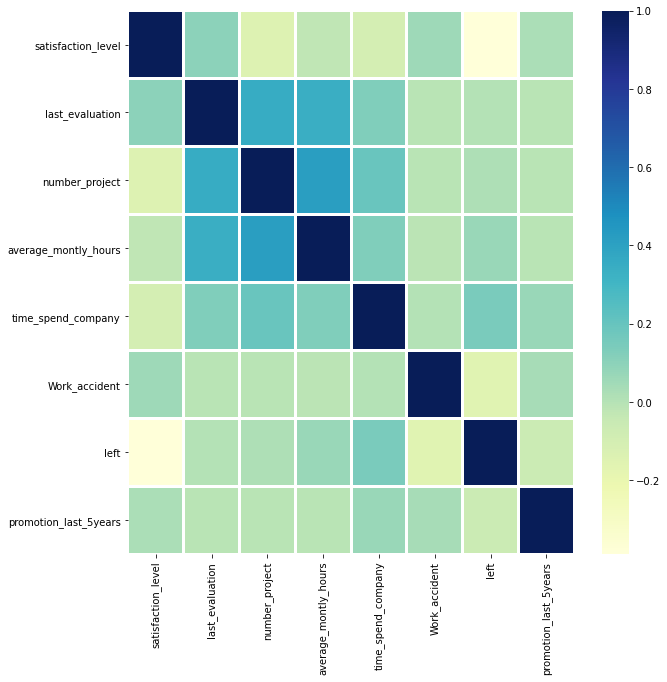

In [13]:
df.corr()

import seaborn as sb
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(df.corr(),linewidths=2,cmap="YlGnBu",ax=ax)

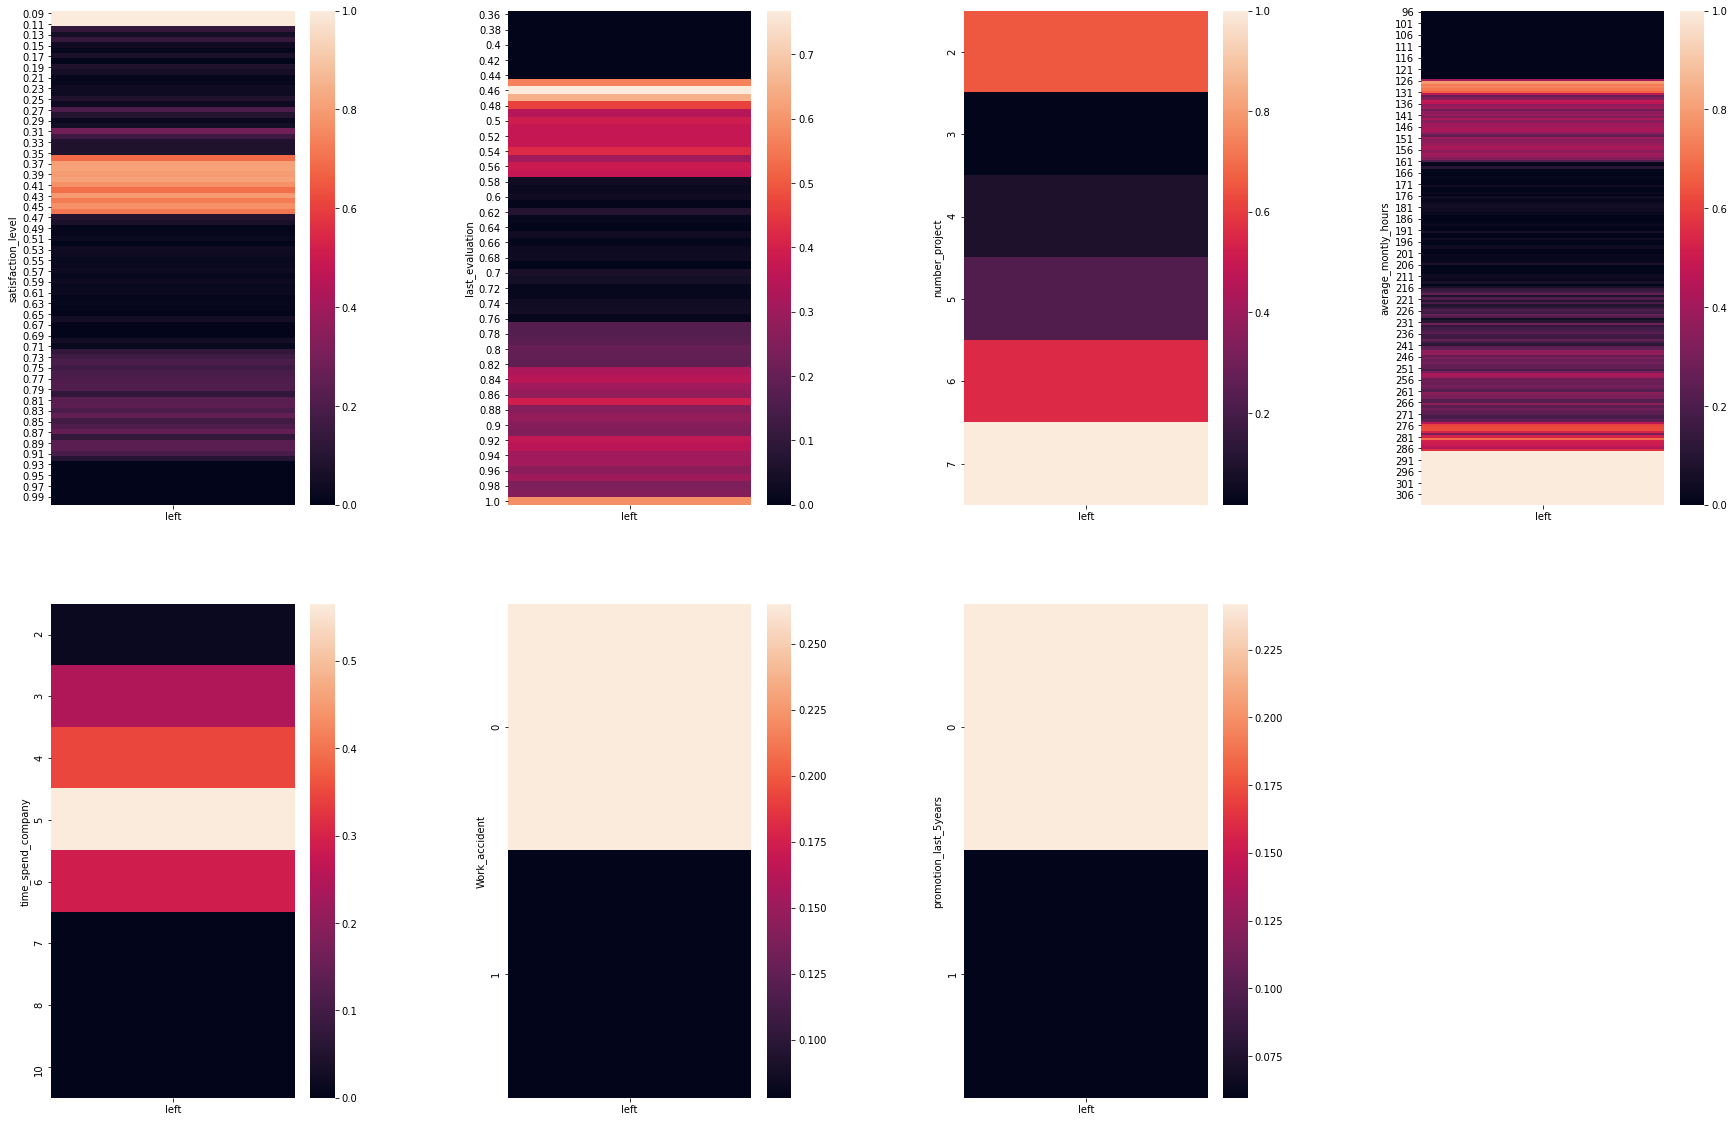

In [18]:
import matplotlib.pyplot as plt
def plot_heatmap(attributes):
    fig, axes = plt.subplots(2,4,figsize=(30,20))
    fig.subplots_adjust(hspace=0.2, wspace=0.5)
    for i, ax in enumerate(axes.flat):
        if i < len(attributes):
          sb.heatmap(df.pivot_table(values='left',index=attributes[i]),ax=ax)
        else:
          fig.delaxes(ax)
attributes = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']
plot_heatmap(attributes)

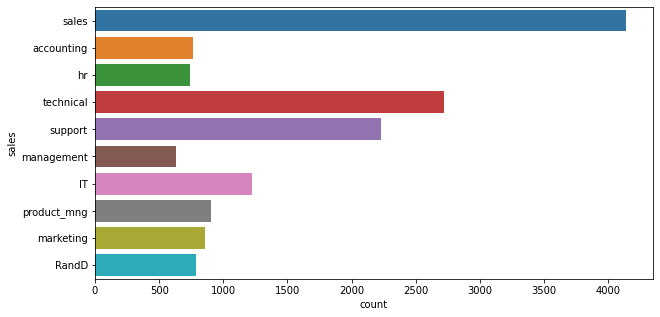

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
df['sales'].value_counts()
sb.countplot(y='sales',data=df)

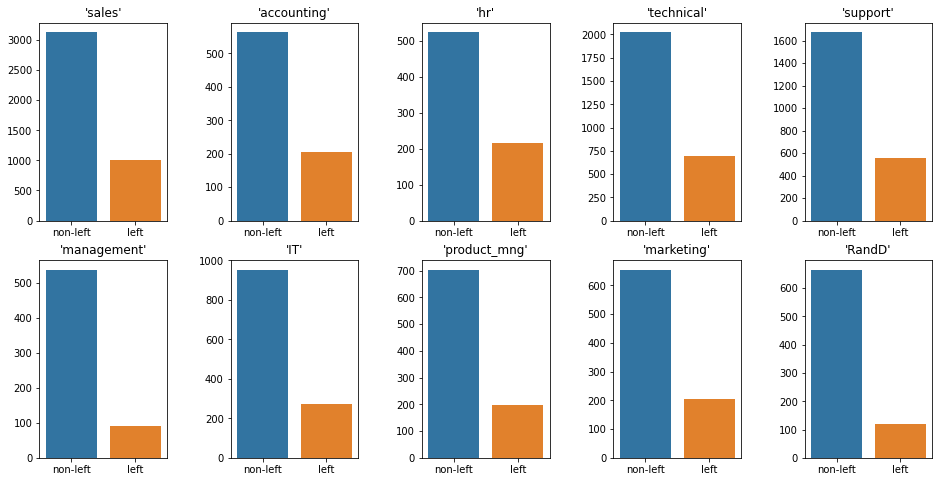

In [86]:
def plot_barplots(df,list_of_categories,key):
  fig, axes = plt.subplots(2,5,figsize=(16,8))
  fig.subplots_adjust(hspace=0.2, wspace=0.5)
  for i, ax in enumerate(axes.flat):
    if i < len(list_of_categories):
      y_data = [df.query(f'left==0 and {key}=={list_of_categories[i]}')[f'{key}'].count(),df.query(f'left==1 and {key}=={list_of_categories[i]}')[f'{key}'].count()]
      sb.barplot(y=y_data,x=['non-left','left'],ax=ax).set_title(list_of_categories[i])
    else:
      fig.delaxes(ax)
plot_barplots(df,["'sales'","'accounting'","'hr'","'technical'","'support'","'management'","'IT'","'product_mng'","'marketing'","'RandD'"],'sales')


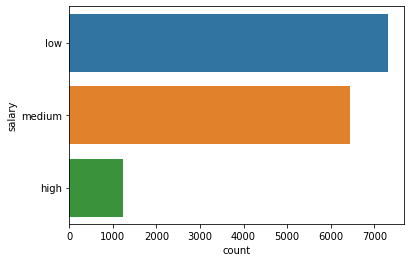

In [29]:
df['salary'].value_counts()
sb.countplot(y='salary',data=df)

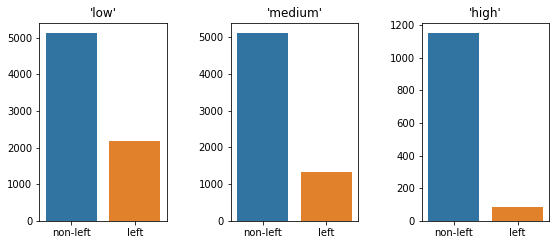

In [85]:
plot_barplots(df,["'low'","'medium'","'high'"],'salary')

In [ ]:
df1 = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary']]
df2 = df['left']
df1['salary'] = df1['salary'].replace({'low':0, 'medium':1,'high':2})
X = df1.iloc[:,:].values
Y = df2.iloc[:].values
X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(14999, 9)

In [ ]:
#handling categorical data
x_7 = LabelEncoder()
X[:,7] = x_7.fit_transform(X[:,7])

ct = ColumnTransformer([('', OneHotEncoder(), [7])], remainder='passthrough')
X = ct.fit_transform(X)

#train test set split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

#feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape

(11999, 18)

In [ ]:
def show_result(y_test,pred):
    print("Accuracy Score:", accuracy_score(y_test,pred))
    print("Classification Report:\n",classification_report(y_test,pred))
    print("Confusion Matrix:\n")
    tmp = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(tmp, annot=True,cmap='Blues', fmt='d')
    plt.show() 

SVM Cross validation 0.7813159302487147
Accuracy Score: 0.7846666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      2299
           1       0.59      0.26      0.36       701

    accuracy                           0.78      3000
   macro avg       0.70      0.60      0.61      3000
weighted avg       0.76      0.78      0.75      3000

Confusion Matrix:



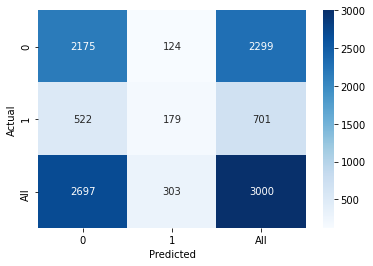

In [ ]:
#SVM
svm=SVC(kernel='linear')
kfold = model_selection.KFold(n_splits=5)
s = model_selection.cross_val_score(svm,x_train,y_train,cv=kfold, scoring = 'accuracy')
print("SVM Cross validation: ",s.mean())

svm.fit(x_train,y_train)
pred = svm.predict(x_test)
show_result(y_test,pred)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random Forest Cross validation 0.9710809712380157
Accuracy Score: 0.9716666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2299
           1       0.99      0.89      0.94       701

    accuracy                           0.97      3000
   macro avg       0.98      0.94      0.96      3000
weighted avg       0.97      0.97      0.97      3000

Confusion Matrix:



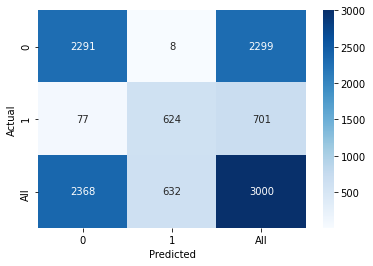

In [ ]:
#random forest
random_forest = RandomForestClassifier(n_estimators = 150,min_samples_split=25, max_depth=10,max_features = 2)

kfold = model_selection.KFold(n_splits=5, random_state=2)
rf = model_selection.cross_val_score(random_forest,x_train,y_train,cv=kfold, scoring = 'accuracy')
print("Random Forest Cross validation: ",rf.mean())

random_forest.fit(x_train,y_train)
pred = random_forest.predict(x_test)
show_result(y_test,pred)

In [ ]:
#model evaluation
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def k_classifier():
    classifier = Sequential()
    #first hidden layer
    classifier.add(Dense(9,kernel_initializer = "uniform",activation = "relu",input_dim = x_train.shape[1]))
    #second hidden layer
    classifier.add(Dense(9,kernel_initializer = "uniform",activation = "relu"))
    #output layer
    classifier.add(Dense(1,kernel_initializer = "uniform",activation = "sigmoid"))
    #compile
    classifier.compile(optimizer = "adam",loss = "binary_crossentropy",metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = k_classifier,batch_size = 10, epochs = 20 )
#fit and train
n_accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train,cv = 4)

Epoch 1/20
900/900 [==============================] - 2s 2ms/step - loss: 0.4093 - accuracy: 0.8000
Epoch 2/20
900/900 [==============================] - 2s 2ms/step - loss: 0.2381 - accuracy: 0.9217
Epoch 3/20
900/900 [==============================] - 2s 2ms/step - loss: 0.1955 - accuracy: 0.9442
Epoch 4/20
900/900 [==============================] - 2s 2ms/step - loss: 0.1775 - accuracy: 0.9484
Epoch 5/20
900/900 [==============================] - 2s 2ms/step - loss: 0.1685 - accuracy: 0.9513
Epoch 6/20
900/900 [==============================] - 2s 2ms/step - loss: 0.1622 - accuracy: 0.9518
Epoch 7/20
900/900 [==============================] - 2s 2ms/step - loss: 0.1567 - accuracy: 0.9536
Epoch 8/20
900/900 [==============================] - 2s 2ms/step - loss: 0.1520 - accuracy: 0.9557
Epoch 9/20
900/900 [==============================] - 2s 2ms/step - loss: 0.1503 - accuracy: 0.9558
Epoch 10/20
900/900 [==============================] - 2s 2ms/step - loss: 0.1468 - accuracy: 0.9560

In [ ]:
print(n_accuracies)

[0.95833331 0.93733335 0.96033335 0.94498163]


In [ ]:
mean = n_accuracies.mean()
variance = n_accuracies.std()
print("mean {} variance {}".format(mean,variance))


mean 0.9502454102039337 variance 0.009508015105981354


In [ ]:
#performance tuning
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def k_classifier():
    classifier = Sequential()
    #first hidden layer
    classifier.add(Dense(9,kernel_initializer = "uniform",activation = "relu",input_dim = x_train.shape[1]))
    #second hidden layer
    classifier.add(Dense(9,kernel_initializer = "uniform",activation = "relu"))
    #output layer
    classifier.add(Dense(1,kernel_initializer = "uniform",activation = "sigmoid"))
    #compile
    classifier.compile(optimizer = "adam",loss = "binary_crossentropy",metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = k_classifier)
params = {'batch_size' : [20,30],
          'epochs' : [32,64]}
grid = GridSearchCV(estimator = classifier, param_grid = params,scoring = 'accuracy',cv=4)
grid = grid.fit(x_train,y_train)
ideal_params = grid.best_params_
best_acc = grid.best_score_


Epoch 1/32
450/450 [==============================] - 1s 2ms/step - loss: 0.4885 - accuracy: 0.7552
Epoch 2/32
450/450 [==============================] - 1s 2ms/step - loss: 0.3508 - accuracy: 0.8036
Epoch 3/32
450/450 [==============================] - 1s 2ms/step - loss: 0.3064 - accuracy: 0.8835
Epoch 4/32
450/450 [==============================] - 1s 2ms/step - loss: 0.2773 - accuracy: 0.9152
Epoch 5/32
450/450 [==============================] - 1s 2ms/step - loss: 0.2560 - accuracy: 0.9288
Epoch 6/32
450/450 [==============================] - 1s 2ms/step - loss: 0.2391 - accuracy: 0.9354
Epoch 7/32
450/450 [==============================] - 1s 2ms/step - loss: 0.2278 - accuracy: 0.9372
Epoch 8/32
450/450 [==============================] - 1s 2ms/step - loss: 0.2196 - accuracy: 0.9393
Epoch 9/32
450/450 [==============================] - 1s 2ms/step - loss: 0.2134 - accuracy: 0.9400
Epoch 10/32
450/450 [==============================] - 1s 2ms/step - loss: 0.2083 - accuracy: 0.9403

In [ ]:
print(ideal_params)
print(best_acc)

{'batch_size': 30, 'epochs': 64}
0.9514132766477715


In [ ]:
classifier.fit(x_train, y_train,
          batch_size=32,
          epochs=64)


Epoch 1/64
375/375 [==============================] - 1s 2ms/step - loss: 0.5077 - accuracy: 0.7599
Epoch 2/64
375/375 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.7679
Epoch 3/64
375/375 [==============================] - 1s 2ms/step - loss: 0.3246 - accuracy: 0.8582
Epoch 4/64
375/375 [==============================] - 1s 2ms/step - loss: 0.2911 - accuracy: 0.9006
Epoch 5/64
375/375 [==============================] - 1s 2ms/step - loss: 0.2668 - accuracy: 0.9202
Epoch 6/64
375/375 [==============================] - 1s 2ms/step - loss: 0.2492 - accuracy: 0.9314
Epoch 7/64
375/375 [==============================] - 1s 2ms/step - loss: 0.2370 - accuracy: 0.9355
Epoch 8/64
375/375 [==============================] - 1s 2ms/step - loss: 0.2275 - accuracy: 0.9366
Epoch 9/64
375/375 [==============================] - 1s 2ms/step - loss: 0.2201 - accuracy: 0.9382
Epoch 10/64
375/375 [==============================] - 1s 2ms/step - loss: 0.2144 - accuracy: 0.9393

Accuracy Score: 0.952
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2299
           1       0.92      0.88      0.90       701

    accuracy                           0.95      3000
   macro avg       0.94      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000

Confusion Matrix:



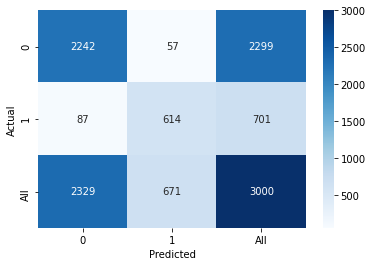

In [ ]:
pred = classifier.predict(x_test)
predList = pred.flatten()
show_result(y_test,predList)